Source for code: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [135]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
etfs_mfs=pd.read_csv('ETFs+MFs.csv')

/usr/local/Anaconda3-5.3.1-Linux-x86_64/envs/jupyter-atp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (99,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
etfs_mfs.head()

,Unnamed: 0,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,legal_type,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,0,1305,Daiwa ETF TOPIX,NaN,Daiwa Asset Management Co Ltd,4.010000e+12,NaN,1.84,Exchange Traded Fund,Blend,...,0.59,NaN,0.60,NaN,3.92,NaN,8.01,NaN,9.29,NaN
1,1,1306,Nomura TOPIX ETF,NaN,Nomura Asset Management Co Ltd,8.430000e+12,NaN,1.77,Exchange Traded Fund,Blend,...,0.59,NaN,0.61,NaN,3.94,NaN,8.03,NaN,9.33,NaN
2,2,1308,Nikko Exchange Traded Index TOPIX,NaN,Nikko Asset Management Co Ltd,3.730000e+12,NaN,1.84,Exchange Traded Fund,Blend,...,0.59,NaN,0.60,NaN,3.93,NaN,8.03,NaN,9.31,NaN
3,3,1309,Nomura SSE50 Index Link ETF,NaN,Nomura Asset Management Co Ltd,4.450000e+09,NaN,0.00,Exchange Traded Fund,Value,...,0.36,NaN,0.26,NaN,-4.41,NaN,6.32,NaN,4.29,NaN
4,4,1310,Daiwa ETF TOPIX Core 30,NaN,Daiwa Asset Management Co Ltd,1.920000e+09,NaN,2.57,Exchange Traded Fund,Blend,...,0.34,NaN,0.44,NaN,1,NaN,4.08,NaN,6.18,NaN


In [142]:
#drop nas in order to predict
etf_mfs_clean=etfs_mfs.dropna()

In [137]:
#columns-possible predictors
etf_mfs_clean.columns

Index(['Unnamed: 0', 'fund_name', 'fund_extended_name', 'category',
       'fund_family', 'net_assets', 'ytd_return', 'fund_yield', 'legal_type',
       'investment',
       ...
       'fund_sharpe_ratio_5years', 'category_sharpe_ratio_5years',
       'fund_sharpe_ratio_10years', 'category_sharpe_ratio_10years',
       'fund_treynor_ratio_3years', 'category_treynor_ratio_3years',
       'fund_treynor_ratio_5years', 'category_treynor_ratio_5years',
       'fund_treynor_ratio_10years', 'category_treynor_ratio_10years'],
      dtype='object', length=105)

**Simple Linear Regression**

In [143]:
#our two variables. y is what we want to predict
X = etf_mfs_clean['fund_sharpe_ratio_5years'].values.reshape(-1,1)
y = etf_mfs_clean['ytd_return'].values.reshape(-1,1)

#creating the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#creating our model
regressor = LinearRegression()
#training the algorithm 
regressor.fit(X_train, y_train) 
#predicting the Y values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,9.27,9.603509
1,5.03,11.093574
2,13.42,9.926356
3,12.21,10.423045
4,20.52,10.646554
5,2.66,11.093574
6,12.56,8.386623
7,11.77,10.224369
8,2.19,11.416421
9,14.39,10.298873


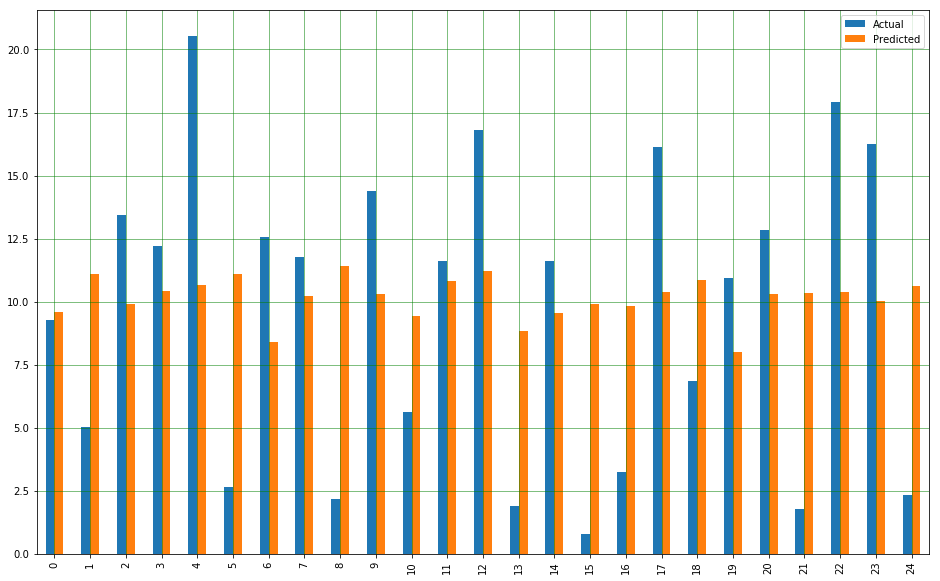

In [144]:
#bargraph comparing actual vs predicted
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()   

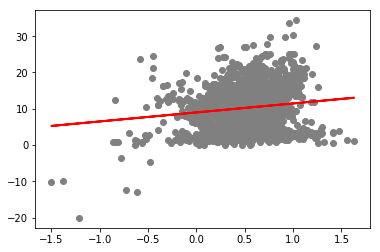

In [145]:
#graph showing actual (in grey) and predicted line (in red)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [146]:
#some statistics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.502833579183225
Mean Squared Error: 31.23610324514389
Root Mean Squared Error: 5.588926841992467


**Multiple Linear Regression**

In [156]:

#note- only numerical values can be put into the model
X = etf_mfs_clean[['net_assets', 'fund_yield','fund_sharpe_ratio_5years', 'category_sharpe_ratio_5years',
       'price_book']].values
y = etf_mfs_clean['ytd_return'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [159]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,9.27,8.991151
1,5.03,7.335367
2,13.42,6.020583
3,12.21,10.043689
4,20.52,17.563991
5,2.66,9.338088
6,12.56,6.875648
7,11.77,9.240662
8,2.19,8.284834
9,14.39,12.814139


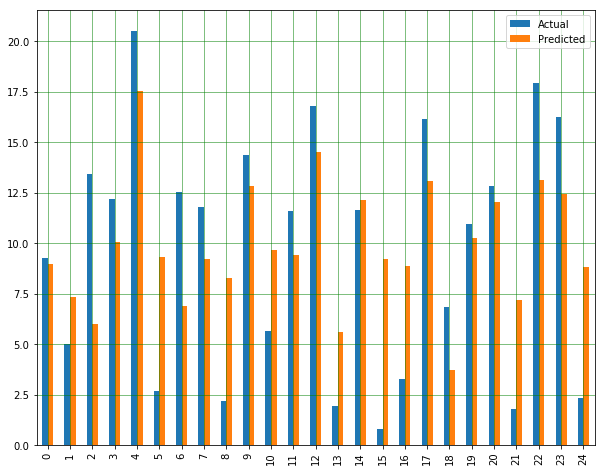

In [160]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [161]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.4349430947191273
Mean Squared Error: 19.976077406480467
Root Mean Squared Error: 4.469460527455239
